<a href="https://colab.research.google.com/github/SergioManuelJob/DengueStudy/blob/master/EstudioDengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sergio Manuel Suárez Suárez

## Importación de librerias.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, confusion_matrix

## Creación de los datasets.

In [ ]:
train_url = "https://raw.githubusercontent.com/SergioManuelJob/data/master/dengue_features_train.csv"
test_url = "https://raw.githubusercontent.com/SergioManuelJob/data/master/dengue_features_test.csv"
train_labels_url = "https://raw.githubusercontent.com/SergioManuelJob/data/master/dengue_labels_train.csv"

In [ ]:
dataset = pd.read_csv(train_url)
dataset_test = pd.read_csv(test_url)
labels = pd.read_csv(train_labels_url)

## Estudio básico de los datasets.

In [ ]:
def get_information(dataset):
  print(dataset.shape)
  print(dataset.info())
  return dataset.describe()

In [ ]:
dataset.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
get_information(dataset)

(1456, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float6

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [ ]:
dataset_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [ ]:
get_information(dataset_test)

(416, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,303.623430,295.743478,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,3.101817,2.761109,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,298.200000,286.200000,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,301.425000,293.500000,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,302.750000,296.300000,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,305.800000,298.275000,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,314.100000,299.700000,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


In [ ]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [ ]:
labels.tail()

,city,year,weekofyear,total_cases
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1
1455,iq,2010,25,4


## Correción.

### Después de haber visto los datasets que he importado, tengo más claro el procedimiento a seguir. Primero hay que tratar de alguna forma los nulos, para después proceder a una normalización de los datos, ya que hay valores negativos del tipo -0.4, hasta valores máximos del 320. Y por último, la "y" de este problema es el dataset de labels, que tiene las respuestas de train, pero no todas las de test debido a que las tenemos que predecir.

In [ ]:
# Juntamos los casos totales de los labels con el dataset, para que cuando borremos nulos estos también se borren.
dataset = dataset.merge(labels, on=['year', 'weekofyear', 'city'], how='left')

In [ ]:
dataset.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


### Y ahora sí, quitamos nulos.

In [ ]:
dataset = dataset.dropna()

## Ahora vamos a revisar outliers.

In [ ]:
dataset['total_cases'].value_counts()

0      88
2      67
5      60
6      59
3      55
       ..
150     1
191     1
256     1
329     1
58      1
Name: total_cases, Length: 117, dtype: int64

Vemos que, efectivamente, hay casos como el 329 y otros valores que se salen mucho de la "realidad", por lo que vamos a eliminarlos.

In [ ]:
Q1 = dataset['total_cases'].quantile(0.25)
Q3 = dataset['total_cases'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define el límite superior para identificar outliers
limite_superior = Q3 + 1.5 * IQR

# Filtra los datos para eliminar outliers superiores
dataset = dataset[dataset['total_cases'] <= limite_superior]

# Imprime el tamaño antes y después de quitar los outliers
print("Tamaño del conjunto de datos original:", len(dataset))

Tamaño del conjunto de datos original: 1103


In [ ]:
get_information(dataset)

(1199, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1199 non-null   object 
 1   year                                   1199 non-null   int64  
 2   weekofyear                             1199 non-null   int64  
 3   week_start_date                        1199 non-null   object 
 4   ndvi_ne                                1199 non-null   float64
 5   ndvi_nw                                1199 non-null   float64
 6   ndvi_se                                1199 non-null   float64
 7   ndvi_sw                                1199 non-null   float64
 8   precipitation_amt_mm                   1199 non-null   float64
 9   reanalysis_air_temp_k                  1199 non-null   float64
 10  reanalysis_avg_temp_k                  1199 non-null   float6

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,2001.303586,26.497081,0.139716,0.134362,0.205564,0.205708,47.578932,298.675363,299.243495,295.303517,303.661301,295.583903,41.548791,82.632914,47.578932,16.809640,5.136673,27.228617,8.247724,32.569141,22.075480,40.915847,21.197665
std,5.345922,14.895735,0.140115,0.120743,0.074457,0.085548,43.179096,1.364722,1.261411,1.500510,3.298576,2.590202,44.486750,7.301886,43.179096,1.518780,3.593513,1.267688,2.175908,1.950095,1.553057,48.996480,30.856555
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1998.000000,14.000000,0.042425,0.051587,0.155607,0.144950,12.550000,297.637143,298.289286,294.216429,301.100000,293.600000,13.525000,77.367857,12.550000,15.654286,2.357143,26.430952,6.592857,31.400000,21.100000,9.700000,4.000000
50%,2002.000000,26.000000,0.124300,0.126800,0.196729,0.192300,41.410000,298.618571,299.321429,295.682857,302.600000,296.000000,28.600000,80.795714,41.410000,17.172857,3.000000,27.450000,7.471429,32.800000,22.100000,24.700000,11.000000
75%,2006.000000,39.000000,0.246879,0.220714,0.252550,0.254400,71.765000,299.792143,300.221429,296.502143,306.000000,297.900000,54.750000,88.155000,71.765000,18.012857,8.028571,28.157143,10.012500,33.900000,23.300000,56.050000,26.000000
max,2010.000000,52.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.614286,298.450000,313.200000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,329.000000


## Estudio más profundo de los datasets.

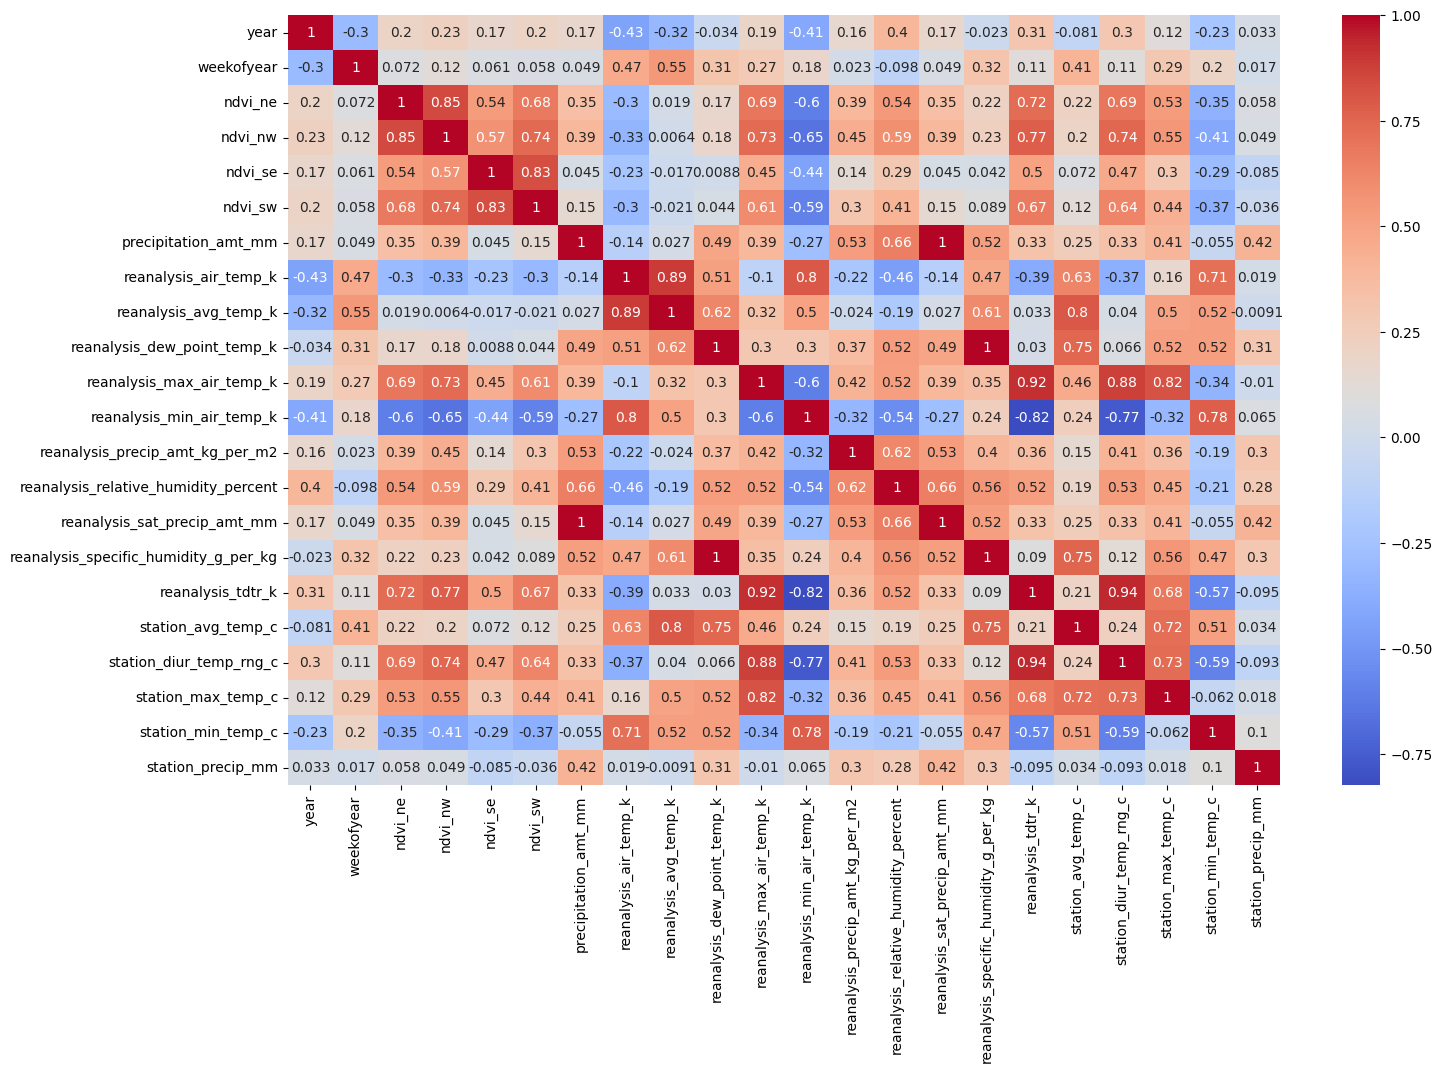

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(dataset_test.corr(), cmap="coolwarm", annot=True)
plt.show()

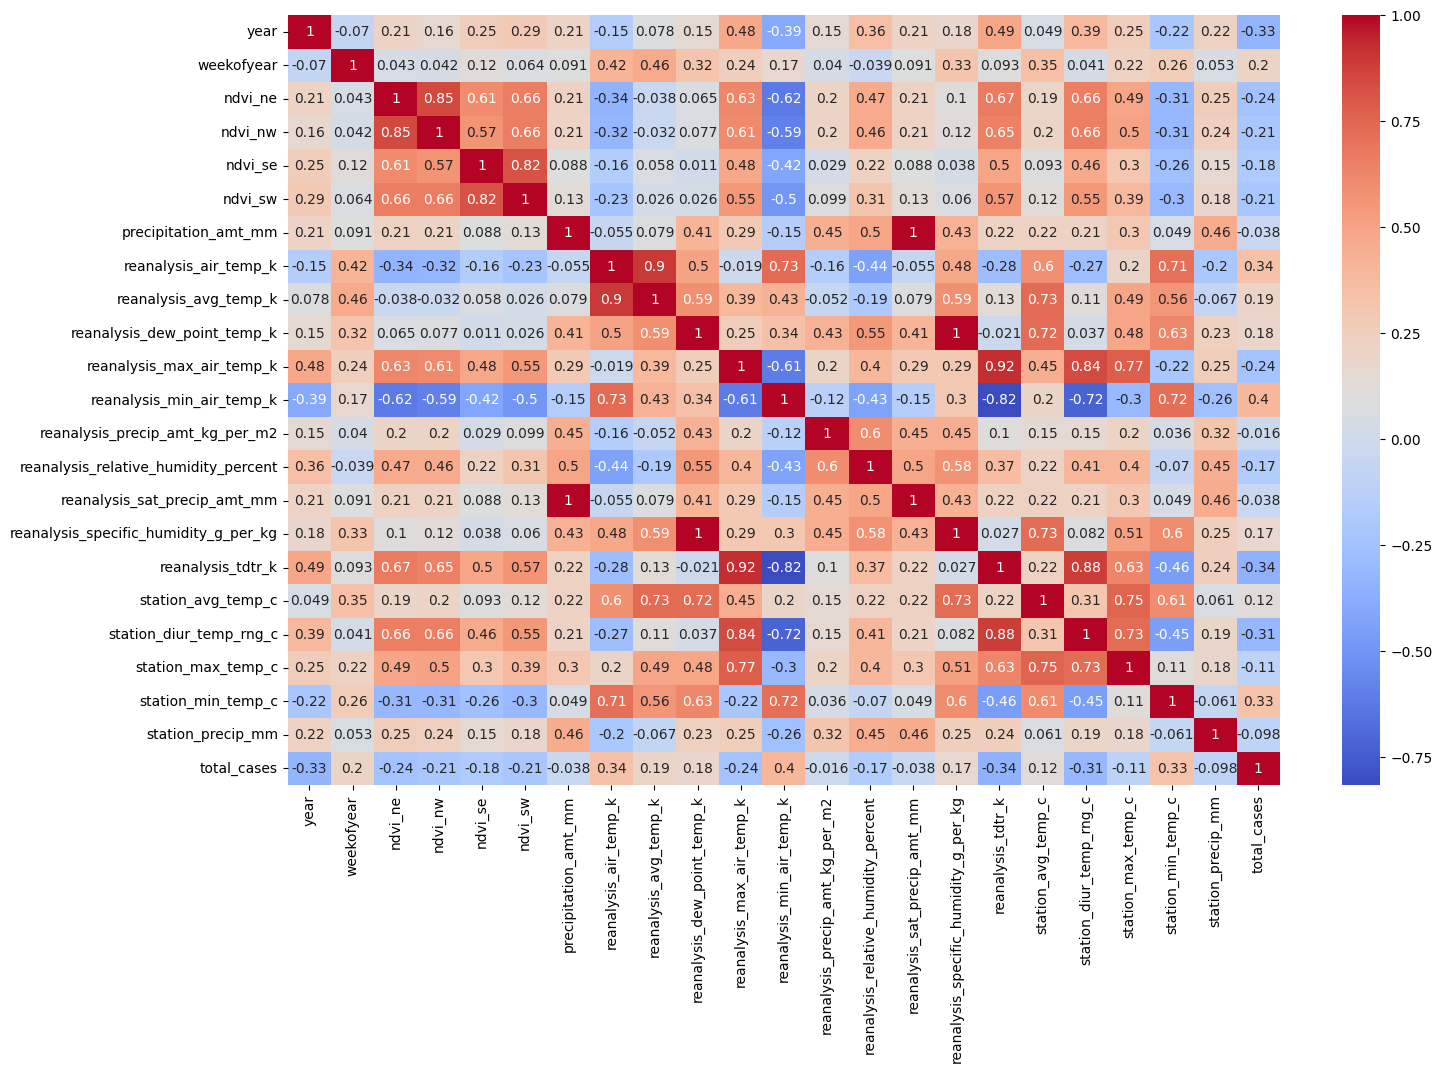

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=True)
plt.show()

### Al ver la matriz de correlación, vemos que hay unas cuantas correlaciones fuertes, lo que voy a hacer es tener esto en cuenta en la selección de características, y no coger aquellas características que tienen otra fuertemente relacionada (digamos que están son las que tienen un 80% o más), sino solo coger una de las dos.

In [ ]:
X = dataset.drop(["total_cases", "city", "week_start_date"], axis=1)
y = dataset["total_cases"]

'reanalysis_min_air_temp_k'

In [ ]:
from sklearn.feature_selection import f_regression
# Utilizar SelectKBest con f_regression primero, ya que quiero comprobarlo con otra score_func
for i in range(1, 10, 1):
  k = i
  selector = SelectKBest(score_func=f_regression, k=k)
  X_new = selector.fit_transform(X, y)

  selected_columns = X.columns[selector.get_support()]

  print("Características seleccionadas de la iteración:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas de la iteración:1
Index(['reanalysis_min_air_temp_k'], dtype='object')

Características seleccionadas de la iteración:2
Index(['reanalysis_min_air_temp_k', 'reanalysis_tdtr_k'], dtype='object')

Características seleccionadas de la iteración:3
Index(['year', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k'], dtype='object')

Características seleccionadas de la iteración:4
Index(['year', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c'],
      dtype='object')

Características seleccionadas de la iteración:5
Index(['year', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c'],
      dtype='object')

Características seleccionadas de la iteración:6
Index(['year', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c'],
      dtype='object')

Características seleccionadas de la itera

Cogí un total de 10 columnas, que es la mitad del dataset, y elaboro una matriz de correlación para ahora al seleccionarlas ver que no estén muy correlacionadas.

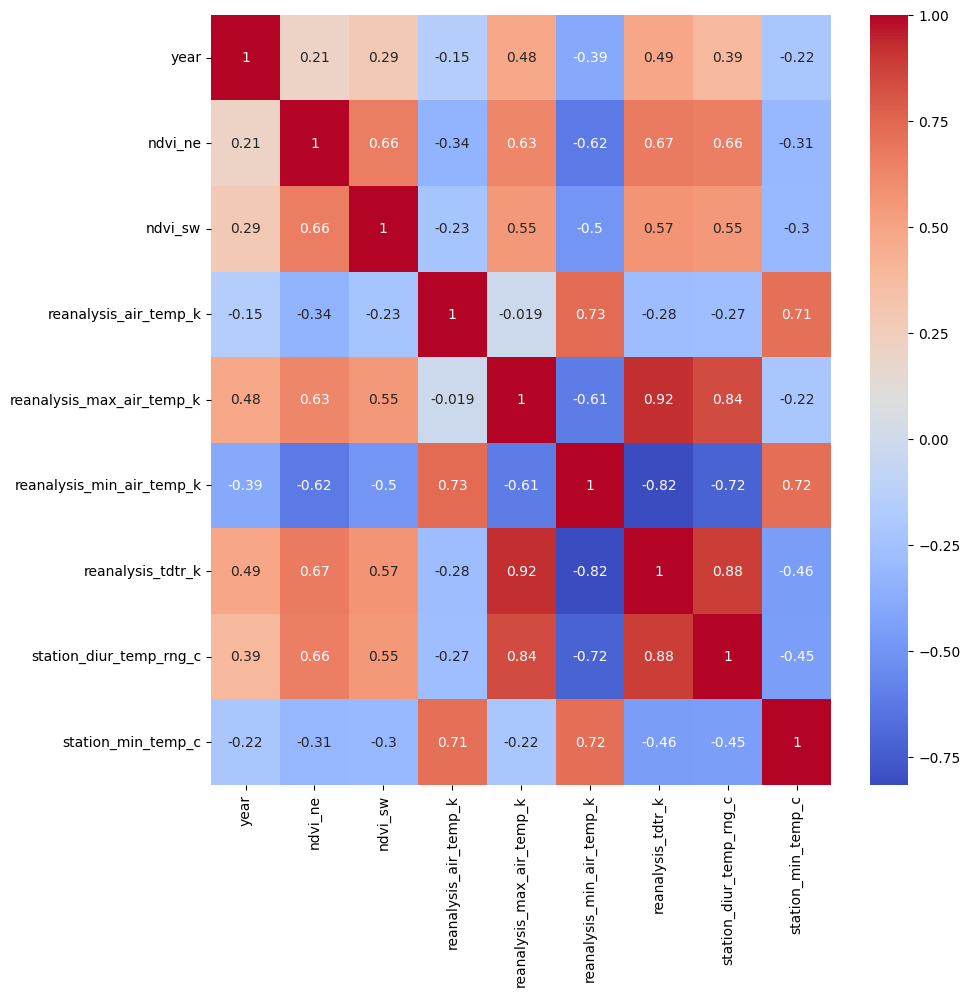

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(X[['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_sw',
       'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_min_temp_c']].corr(), cmap="coolwarm", annot=True)
plt.show()

Ahora vamos a elaborar el array de las características seleccionadas, en caso de tener que escoger entre dos características fuertemente relacionadas (esto puede ser tanto con un 0.90 como con un -0.90, recordemos), cogeré aquella que salió antes en el Kbest.

In [ ]:
selected_columns = ["reanalysis_min_air_temp_k", "reanalysis_air_temp_k", "station_min_temp_c", "ndvi_ne", "reanalysis_max_air_temp_k", "ndvi_sw"]
# selected_columns = ['year', 'ndvi_ne', 'ndvi_sw', 'reanalysis_air_temp_k',
#        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
#        'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c']

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# Y ahora lo hacemos con el mutual_info
for i in range(1, 8, 1):
  k = i
  selector = SelectKBest(score_func=mutual_info_regression, k=k)
  X_new = selector.fit_transform(X, y)

  selected_columns = X.columns[selector.get_support()]

  print("Características seleccionadas de la iteración:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas de la iteración:1
Index(['year'], dtype='object')

Características seleccionadas de la iteración:2
Index(['year', 'reanalysis_tdtr_k'], dtype='object')

Características seleccionadas de la iteración:3
Index(['year', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k'], dtype='object')

Características seleccionadas de la iteración:4
Index(['year', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_min_temp_c'],
      dtype='object')

Características seleccionadas de la iteración:5
Index(['year', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_min_temp_c'],
      dtype='object')

Características seleccionadas de la iteración:6
Index(['year', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c'],
      dtype='object')

Características seleccionadas de la iteración:7
Index(['year', 'reanalysis_max_air_temp_k', 'reanalysis_m

Este selector de aquí no me gustó mucho ya que considera que "year" es la mejor característica para el entrenamiento, y es una columna que sirve en este dataset a modo de identificador realmente, así que lo voy a descartar.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Datos de train:", X_train.shape)
print("Datos de validación:", X_val.shape)
print("Datos de test:", dataset_test.shape)

Datos de train: (882, 22)
Datos de validación: (221, 22)
Datos de test: (353, 24)


## Entrenamiento de los distintos modelos buscando hiperparametrización correcta.

Voy a hacer dos entrenamientos, uno con la X con todas sus columnas, y otro con las mejores columnas de la X que hemos escogido antes, para ver la diferencia

### Modelo número 1: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de árbol de decisión
tree_model = DecisionTreeRegressor()

### Modelo número 2: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de bosque aleatorio de regresión
tree_model = RandomForestRegressor()

## Con toda la X.

In [ ]:
# Definimos los datos para busqueda de grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda en grid
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_grid = grid_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda
print("Mejores hiperparámetros encontrados con GridSearchCV:")
print(best_params_grid)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_random = random_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda
print("\nMejores hiperparámetros encontrados con RandomizedSearchCV:")
print(best_params_random)

Mejores hiperparámetros encontrados con GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}

Mejores hiperparámetros encontrados con RandomizedSearchCV:
{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


Entrenamiento utilizando cross-validation con los mejores hiperparámetros, pero con todas las columnas de X.

### **Para entrenar el DECISION TREE REGRESSOR**

In [ ]:
# Utilizar los mejores hiperparámetros encontrados para entrenar el modelo
best_tree_model_grid = DecisionTreeRegressor(**best_params_grid)
best_tree_model_random = DecisionTreeRegressor(**best_params_random)

# Evaluar con cross-validation
cv_scores_grid = cross_val_score(best_tree_model_grid, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_random = cross_val_score(best_tree_model_random, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Mostrar los resultados de cross-validation
print("Resultados de Cross-Validation con GridSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_grid))

print("\nResultados de Cross-Validation con RandomizedSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_random))

Resultados de Cross-Validation con GridSearchCV:
MAE promedio: 7.483988573070855

Resultados de Cross-Validation con RandomizedSearchCV:
MAE promedio: 7.603371384233325


### **Para entrenar el RANDOM FOREST REGRESOR**

In [ ]:
# Utilizar los mejores hiperparámetros encontrados para entrenar el modelo
best_tree_model_grid = RandomForestRegressor(**best_params_grid)
best_tree_model_random = RandomForestRegressor(**best_params_random)

# Evaluar con cross-validation
cv_scores_grid = cross_val_score(best_tree_model_grid, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_random = cross_val_score(best_tree_model_random, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Mostrar los resultados de cross-validation
print("Resultados de Cross-Validation con GridSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_grid))

print("\nResultados de Cross-Validation con RandomizedSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_random))

Resultados de Cross-Validation con GridSearchCV:
MAE promedio: 6.400514420676693

Resultados de Cross-Validation con RandomizedSearchCV:
MAE promedio: 6.385047023008704


### Resultados:

**Con el Decision Tree Regressor: 7.5~ de MAE**

**Con el Random Forest Regressor: 6.4~ de MAE**

## Con las columnas que seleccionamos.

In [ ]:
# Definimos los datos para busqueda de grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda en grid
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train[selected_columns], y_train)

# Obtener los mejores hiperparámetros
best_params_grid_selected = grid_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda
print("Mejores hiperparámetros encontrados con GridSearchCV:")
print(best_params_grid_selected)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train[selected_columns], y_train)

# Obtener los mejores hiperparámetros
best_params_random_selected = random_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda
print("\nMejores hiperparámetros encontrados con RandomizedSearchCV:")
print(best_params_random_selected)

Mejores hiperparámetros encontrados con GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Mejores hiperparámetros encontrados con RandomizedSearchCV:
{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': None}


El mismo entrenamiento pero con las columnas que hemos seleccionado.

In [ ]:
# Utilizar los mejores hiperparámetros encontrados para entrenar el modelo
best_tree_model_grid = RandomForestRegressor(**best_params_grid_selected)
best_tree_model_random = RandomForestRegressor(**best_params_random_selected)

# Evaluar con cross-validation
cv_scores_grid = cross_val_score(best_tree_model_grid, X_train[selected_columns], y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_random = cross_val_score(best_tree_model_random, X_train[selected_columns], y_train, cv=5, scoring='neg_mean_absolute_error')

# Mostrar los resultados de cross-validation
print("Resultados de Cross-Validation con GridSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_grid))

print("\nResultados de Cross-Validation con RandomizedSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_random))

Resultados de Cross-Validation con GridSearchCV:
MAE promedio: 7.416050362007863

Resultados de Cross-Validation con RandomizedSearchCV:
MAE promedio: 7.3463573494142125


In [ ]:
# Utilizar los mejores hiperparámetros encontrados para entrenar el modelo
best_tree_model_grid = DecisionTreeRegressor(**best_params_grid_selected)
best_tree_model_random = DecisionTreeRegressor(**best_params_random_selected)

# Evaluar con cross-validation
cv_scores_grid = cross_val_score(best_tree_model_grid, X_train[selected_columns], y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_random = cross_val_score(best_tree_model_random, X_train[selected_columns], y_train, cv=5, scoring='neg_mean_absolute_error')

# Mostrar los resultados de cross-validation
print("Resultados de Cross-Validation con GridSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_grid))

print("\nResultados de Cross-Validation con RandomizedSearchCV:")
print("MAE promedio:", -np.mean(cv_scores_random))

Resultados de Cross-Validation con GridSearchCV:
MAE promedio: 8.3242402700041

Resultados de Cross-Validation con RandomizedSearchCV:
MAE promedio: 8.445425002692756


### Resultados:

**Con el Decision Tree Regressor: 8.4~ de MAE**

**Con el Random Forest Regressor: 7.4~ de MAE**

### Modelo número 3: Linear Regression

Para utilizar este modelo conviene escalar los datos, ya que a diferencia con los de árboles aquí no tener los datos escalados puede repercutir en el entrenamiento correcto del modelo, esto hay que hacerlo tanto con X_train como con X_val.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X_train)
X_linear = pd.DataFrame(normalized_data, columns=X.columns)

In [ ]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X_val)
X_val_linear = pd.DataFrame(normalized_data, columns=X.columns)

Visualizamos que esté bien escalado.

In [ ]:
X_linear

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.40,0.764706,0.384691,0.455219,0.320339,0.380281,0.572478,0.788102,0.759482,0.811397,0.331169,0.889764,0.218054,0.477801,0.572478,0.757633,0.098345,0.693009,0.155894,0.393548,0.844037,0.045463
1,0.50,0.725490,0.623676,0.594568,0.335495,0.448595,0.130261,0.785458,0.762257,0.828543,0.344156,0.834646,0.098861,0.498909,0.130261,0.769742,0.075949,0.676292,0.192649,0.322581,0.844037,0.034051
2,0.10,0.274510,0.512560,0.577334,0.249175,0.308205,0.110625,0.535033,0.516189,0.535720,0.246753,0.685039,0.019457,0.414403,0.110625,0.465291,0.153846,0.594225,0.294043,0.393548,0.642202,0.000000
3,0.65,0.392157,0.615430,0.623733,0.360809,0.384266,0.060676,0.164306,0.251619,0.634560,0.409091,0.346457,0.060578,0.927421,0.060676,0.573085,0.368062,0.645390,0.387833,0.374194,0.697248,0.268360
4,0.15,0.686275,0.522442,0.495269,0.135657,0.188344,0.110753,0.677620,0.642923,0.763153,0.311688,0.866142,0.073795,0.527880,0.110753,0.697936,0.055501,0.747720,0.297845,0.393548,0.788991,0.079882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,0.85,0.196078,0.752891,0.778287,0.492331,0.584228,0.142012,0.306138,0.415356,0.783493,0.389610,0.519685,0.089921,0.945030,0.142012,0.736142,0.324245,0.702128,0.494297,0.412903,0.642202,0.254003
955,0.90,0.254902,0.712839,0.654257,0.372287,0.457139,0.273938,0.404344,0.511563,0.730879,0.493506,0.511811,0.043646,0.798442,0.273938,0.681221,0.493671,0.687943,0.396705,0.432258,0.715596,0.038837
956,0.95,0.078431,0.588285,0.632612,0.371883,0.369456,0.303482,0.378093,0.506013,0.808539,0.428571,0.535433,0.115863,0.903040,0.303482,0.765820,0.462512,0.664894,0.631812,0.464516,0.587156,0.124793
957,0.65,0.254902,0.686466,0.749149,0.400892,0.577782,0.228827,0.454958,0.615171,0.823668,0.629870,0.448819,0.078387,0.852622,0.228827,0.783558,0.544304,0.729787,0.481876,0.483871,0.724771,0.138045


In [ ]:
X_val_linear

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.00,0.039216,0.725647,0.761942,0.367267,0.520156,0.088657,0.611790,0.779082,0.759940,0.662162,0.626984,0.101571,0.739962,0.088657,0.710491,0.526940,0.851656,0.711303,0.816327,0.647727,0.002280
1,0.65,0.333333,0.927286,0.924442,0.568087,0.583473,0.304666,0.270306,0.350053,0.734427,0.439189,0.563492,0.812899,0.978790,0.304666,0.673672,0.259698,0.605960,0.397658,0.581633,0.670455,0.301795
2,0.10,0.823529,0.430573,0.540783,0.148478,0.145271,0.056714,0.752838,0.697972,0.674785,0.243243,0.912698,0.069686,0.497911,0.056714,0.597848,0.065733,0.808609,0.303971,0.571429,0.806818,0.033913
3,0.55,0.490196,0.471851,0.439463,0.409198,0.288670,0.175638,0.858515,0.784418,0.744698,0.331081,0.920635,0.042962,0.491502,0.175638,0.667451,0.112069,0.804636,0.229124,0.622449,0.806818,0.031633
4,0.05,0.784314,0.550272,0.609366,0.256058,0.254265,0.149469,0.709170,0.661686,0.702783,0.270270,0.849206,0.180133,0.563345,0.149469,0.633154,0.046336,0.669536,0.213849,0.459184,0.681818,0.023653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.50,0.117647,0.660675,0.698302,0.303937,0.093725,0.000000,0.431441,0.408751,0.396952,0.128378,0.746032,0.009204,0.454323,0.000000,0.312374,0.053879,0.327815,0.285642,0.285714,0.488636,0.010829
236,0.65,0.372549,0.718278,0.711131,0.562408,0.453199,0.391879,0.000000,0.000000,0.549702,0.236486,0.253968,0.312274,1.000000,0.391879,0.485037,0.235991,0.578146,0.447556,0.540816,0.590909,0.701624
237,0.65,0.843137,0.546084,0.506548,0.123294,0.096151,0.450270,0.921616,0.877268,0.791418,0.364865,0.928571,0.055157,0.490121,0.450270,0.728816,0.087284,0.689404,0.247454,0.622449,0.806818,0.031348
238,1.00,0.352941,0.633693,0.682055,0.224437,0.209693,0.276588,0.360044,0.402348,0.801524,0.540541,0.563492,0.285977,0.982969,0.276588,0.756389,0.342672,0.633775,0.618635,0.663265,0.500000,0.091194


Con todos los datos de X.

In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo de regresión lineal
modelo_lineal = LinearRegression()

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

# Búsqueda en cuadrícula
grid_search = GridSearchCV(modelo_lineal, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_linear, y_train)

# Obtener los mejores hiperparámetros
best_params_grid = grid_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda en cuadrícula
print("Mejores hiperparámetros encontrados con GridSearchCV:")
print(best_params_grid)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(modelo_lineal, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_linear, y_train)

# Obtener los mejores hiperparámetros
best_params_random = random_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda aleatoria
print("\nMejores hiperparámetros encontrados con RandomizedSearchCV:")
print(best_params_random)

Mejores hiperparámetros encontrados con GridSearchCV:
{'fit_intercept': True, 'positive': False}

Mejores hiperparámetros encontrados con RandomizedSearchCV:
{'positive': False, 'fit_intercept': True}


In [ ]:
# Utilizar los mejores hiperparámetros encontrados para entrenar el modelo
best_model_grid = LinearRegression(**best_params_grid)
best_model_random = LinearRegression(**best_params_random)

best_model_grid.fit(X_linear, y_train)
best_model_random.fit(X_linear, y_train)

# Evaluar con MAE en el conjunto de validación
pred_val_grid = best_model_grid.predict(X_val_linear)
pred_val_random = best_model_random.predict(X_val_linear)

mae_val_grid = mean_absolute_error(y_val, pred_val_grid)
mae_val_random = mean_absolute_error(y_val, pred_val_random)

# Mostrar el MAE en el conjunto de validación
print("MAE en el conjunto de validación con GridSearchCV:", mae_val_grid)
print("MAE en el conjunto de validación con RandomizedSearchCV:", mae_val_random)

MAE en el conjunto de validación con GridSearchCV: 12.569905552287779
MAE en el conjunto de validación con RandomizedSearchCV: 12.569905552287779


Con las columnas que seleccionamos.

In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo de regresión lineal
modelo_lineal = LinearRegression()

# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

# Búsqueda en cuadrícula
grid_search = GridSearchCV(modelo_lineal, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train[selected_columns], y_train)

# Obtener los mejores hiperparámetros
best_params_grid = grid_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda en cuadrícula
print("Mejores hiperparámetros encontrados con GridSearchCV:")
print(best_params_grid)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'fit_intercept': [True, False],
    'positive': [True, False],
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(modelo_lineal, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train[selected_columns], y_train)

# Obtener los mejores hiperparámetros
best_params_random = random_search.best_params_

# Mostrar los mejores hiperparámetros encontrados en la búsqueda aleatoria
print("\nMejores hiperparámetros encontrados con RandomizedSearchCV:")
print(best_params_random)

Mejores hiperparámetros encontrados con GridSearchCV:
{'fit_intercept': True, 'positive': False}

Mejores hiperparámetros encontrados con RandomizedSearchCV:
{'positive': False, 'fit_intercept': True}


In [ ]:
# Utilizar los mejores hiperparámetros encontrados para entrenar el modelo
best_model_grid = LinearRegression(**best_params_grid)
best_model_random = LinearRegression(**best_params_random)

best_model_grid.fit(X_train[selected_columns], y_train)
best_model_random.fit(X_train[selected_columns], y_train)

# Evaluar con MAE en el conjunto de validación
pred_val_grid = best_model_grid.predict(X_val_linear[selected_columns])
pred_val_random = best_model_random.predict(X_val_linear[selected_columns])

mae_val_grid = mean_absolute_error(y_val, pred_val_grid)
mae_val_random = mean_absolute_error(y_val, pred_val_random)

# Mostrar el MAE en el conjunto de validación
print("MAE en el conjunto de validación con GridSearchCV:", mae_val_grid)
print("MAE en el conjunto de validación con RandomizedSearchCV:", mae_val_random)

MAE en el conjunto de validación con GridSearchCV: 709.9288883096729
MAE en el conjunto de validación con RandomizedSearchCV: 709.9288883096729


El modelo LinearRegression nos da valores bastante peores que los de árboles, siendo estos:

**Con el LinearRegression con todas las columnas: 12.5 MAE**

**Con el LinearRegression con las columnas seleccionadas: 21 MAE**

# Entrenamiento del modelo final.

El mejor modelo finalmente ha sido el Random Forest Regressor con todas las columnas, así que ese es el que vamos a utilizar. Además, de entre las dos búsquedas de hiperparámetros, el RandomizedSearchCV nos da los mejores resultados, así que ese es el que vamos a utilizar.

In [ ]:
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_

print("Mejores hiperparámetros encontrados con RandomizedSearchCV:")
print(best_params_random)

Mejores hiperparámetros encontrados con RandomizedSearchCV:
{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 10}


MAE en el conjunto de validación con RandomizedSearchCV: 6.855341613442135


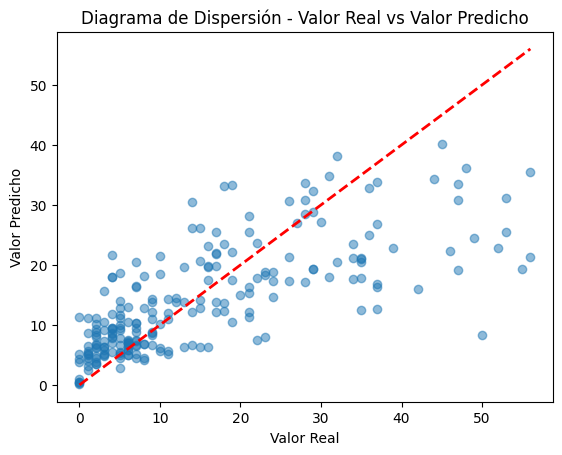

In [ ]:
# Inicializamos el modelo con los mejores hiperparámetros
best_tree_model_random = RandomForestRegressor(**best_params_random)

best_tree_model_random.fit(X_train, y_train)

pred_val_random = best_tree_model_random.predict(X_val)

mae_val_random = mean_absolute_error(y_val, pred_val_random)
print("MAE en el conjunto de validación con RandomizedSearchCV:", mae_val_random)

# Crear un gráfico de dispersión
plt.scatter(y_val, pred_val_random, alpha=0.5)

# Configurar etiquetas y título
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Diagrama de Dispersión - Valor Real vs Valor Predicho')

# Mostrar la línea de la identidad (y = x) para referencia
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', lw=2)

# Mostrar el gráfico
plt.show()

Aquí tuve que hacer algunos arreglos porque me di cuenta que habían outliers, así que si se ve algún error de algún MAE dicho en un punto previo a este, es por eso. Una vez corregido el error, proseguimos.

# Conclusiones:

Utilizando el modelo de Random Forest Regressor, con los hiperparámetros que nos dio el RandomSearchCV, obtenemos un modelo bastante preciso, cosa que observamos no solo en el MAE (que da un error de 6,67~), sino en la gráfica al dividir los datos de forma bastante efectiva. Con esto, vamos a proceder a escribir el fichero de submit.

# Creación del fichero de submit.

Subiré el archivo de submit a los archivos de forma manual. Pero lo que hay que hacer es predecir el dataset de test, y adjuntar la predicción a el submission format.

In [ ]:
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}

random_search = RandomizedSearchCV(tree_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train[selected_columns], y_train)

best_params_random = random_search.best_params_

print("Mejores hiperparámetros encontrados con RandomizedSearchCV:")
print(best_params_random)

best_tree_model_random = RandomForestRegressor(**best_params_random)

best_tree_model_random.fit(X_train[selected_columns], y_train)

Mejores hiperparámetros encontrados con RandomizedSearchCV:
{'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 30}


RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8)

In [ ]:
dataset_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,301.9,297.6,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,302.4,297.5,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [ ]:
submit_format = pd.read_csv('/content/submission_format (1).csv')
submit_format

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0
...,...,...,...,...
411,iq,2013,22,0
412,iq,2013,23,0
413,iq,2013,24,0
414,iq,2013,25,0


Como dataset_test tiene valores nulos, pero el submit necesita que rellenemos todos los campos, vamos a en vez de eliminarlos rellenarlos.

In [ ]:
dataset_test = dataset_test.fillna(dataset_test.mean())

In [ ]:
# Añade las predicciones como una nueva columna al DataFrame original
submit_format['total_cases'] = best_tree_model_random.predict(dataset_test[selected_columns])
submit_format['total_cases'] = submit_format['total_cases'].astype(int)
# Muestra el DataFrame con las predicciones
submit_format

,city,year,weekofyear,total_cases
0,sj,2008,18,10
1,sj,2008,19,11
2,sj,2008,20,11
3,sj,2008,21,17
4,sj,2008,22,10
...,...,...,...,...
411,iq,2013,22,8
412,iq,2013,23,3
413,iq,2013,24,3
414,iq,2013,25,8


In [ ]:
submit_format.to_csv('SubmitPredictionsDengue.csv', index=False)